# 1.各捷運站乘客數

In [2]:
### 加總 各站進站乘客數

import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import gc

path = './HW2_data' # use your path
all_files = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
total_info_list = []
file_number = 0

header_label = ['Date',"24_hour","start_sta","end_sta","num_passenger"]

### get station name
file_ = open("Station ID.txt", 'r', encoding='UTF-8')
data_in_line = file_.readlines()

station_id_list = []
station_list = []

for line in data_in_line:
    station_id_list.append(line.split( )[0])
    station_list.append(line.split( )[1])
file_.close()
### get station name

#### 對每一個檔案讀取
for file_ in all_files:
    print(" ------------------------------------------------------------ ")
    print(file_ + " : ")
    df = pd.read_csv(file_,index_col="start_sta",header=0,names=header_label)
    list_counter = 0;
    
    #### 對每一站的乘客數做計數
    for station_name in station_list:
        num_list = []
        total_passenger_number = 0;

#         print(" -------------------- ")
        try:
            if(station_name == "大橋頭"):
                station_name = "大橋頭站";
            num_list = df.loc[station_name,"num_passenger"]

            if (not num_list.empty) :
#                 print(station_name + " : ")
                for num in num_list:
                    total_passenger_number += num
#                 print("total_passenger_number : " + str(total_passenger_number))
                
                # 當遇到第一個檔案就建立list
                if(file_number == 0):
                    # 1.代號 2.站名 3.乘客數
                    total_info_list.append((station_id_list[list_counter],
                                        station_list[list_counter],
                                        total_passenger_number))
                # 不然，則對 list更新資料
                else:
                    add_total_passenger_number = total_info_list[list_counter][2]
                    add_total_passenger_number += total_passenger_number
                    total_info_list[list_counter] = ((station_id_list[list_counter],
                                                        station_list[list_counter],
                                                        add_total_passenger_number))
        except:
            print("except")
            print(station_name + " : 沒有資料")
            
        list_counter += 1
    
    file_number += 1
#     clear_df = {}
#     df = pd.DataFrame(clear_df)
    del df
    gc.collect()

print("Done")      
# clear list
# total_info_list.clear()
station_id_list.clear()
station_list.clear()

 ------------------------------------------------------------ 
./HW2_data_2\201701.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201702.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201703.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201704.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201705.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201706.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201707.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201708.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201709.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201710.csv : 
 ------------------------------------------------------------ 
./HW2_data_2\201711.csv : 
 ---------

In [6]:
### 各捷運站總乘客數

print("各站進站總乘客數")
print("代號\t\t車站名稱\t\t乘客數(人)")
for info in total_info_list:
    print(str(info[0]) + "\t\t" + str(info[1]) + "\t\t" + str(info[2]))

各站進站總乘客數
代號		車站名稱		乘客數(人)
BR01		動物園		6153006
BR02		木柵		3167078
BR03		萬芳社區		1890053
BR04		萬芳醫院		10232334
BR05		辛亥		2393931
BR06		麟光		3326659
BR07		六張犁		8611909
BR08		科技大樓		10994622
BR12		中山國中		11198719
BR13		松山機場		4446932
BR14		大直		7061806
BR15		劍南路		8794220
BR16		西湖		11136434
BR17		港墘		10687410
BR18		文德		4128736
BR19		內湖		6595403
BR20		大湖公園		2644621
BR21		葫洲		6002207
BR22		東湖		6156789
BR23		南港軟體園區		3530155
R02		象山		9277790
R03		台北101/世貿		25231313
R04		信義安和		12826697
R05BR09		大安		18091032
R06		大安森林公園		6963905
R07O06		東門		19213970
R09		台大醫院		16813373
R12		雙連		16652435
R14		圓山		21450301
R15		劍潭		27587595
R16		士林		22471299
R17		芝山		17923050
R18		明德		9452571
R19		石牌		22744278
R20		唭哩岸		5835696
R21		奇岩		7109712
R22		北投		13175427
R22A		新北投		5249303
R23		復興崗		2722332
R24		忠義		2138122
R25		關渡		9097342
R26		竹圍		7141596
R27		紅樹林		5745237
R28		淡水		30966806
G01		新店		10000904
G02		新店區公所		8270805
G03		七張		12633427
G03A		小碧潭		1822959
G04		大坪林		15880601
G05		景美		12674284
G06		萬隆		7536929
G07		公館		23351

# 2. Top 10 乘客數的捷運站 長方圖

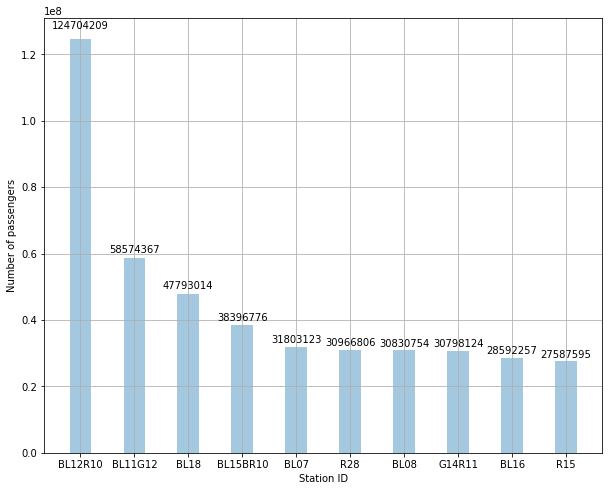

代號		站名
BL12R10		台北車站
BL11G12		西門
BL18		市政府
BL15BR10	忠孝復興
BL07		板橋
R28		淡水
BL08		新埔
G14R11		中山
BL16		忠孝敦化
R15		劍潭


In [8]:
import matplotlib.pyplot as plt
import numpy as np

### 排序，依乘客數排序
def takeThird(elem):
    return elem[2]

total_info_list.sort(key=takeThird, reverse=True)
### 排序，依乘客數排序

plt.figure(figsize=(10,8)) #整个现实图（框架）的大小
col_count = 10
bar_width = 0.4
index = np.arange(col_count)
A_scores = (total_info_list[0][2],
            total_info_list[1][2],
            total_info_list[2][2],
            total_info_list[3][2],
            total_info_list[4][2],
            total_info_list[5][2],
            total_info_list[6][2],
            total_info_list[7][2],
            total_info_list[8][2],
            total_info_list[9][2])

A = plt.bar(index,
           A_scores, 
           bar_width,
           alpha=.4)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",)
        
createLabels(A)

plt.ylabel("Number of passengers")
plt.xlabel("Station ID")
plt.xticks(index+.0 / 2 ,(total_info_list[0][0], 
                          total_info_list[1][0], 
                          total_info_list[2][0], 
                          total_info_list[3][0], 
                          total_info_list[4][0],
                          total_info_list[5][0], 
                          total_info_list[6][0], 
                          total_info_list[7][0], 
                          total_info_list[8][0], 
                          total_info_list[9][0]))

plt.grid(True)
plt.show()

print("代號\t\t站名")
print(total_info_list[0][0] + "\t\t" + total_info_list[0][1])
print(total_info_list[1][0] + "\t\t" + total_info_list[1][1])
print(total_info_list[2][0] + "\t\t" + total_info_list[2][1])
print(total_info_list[3][0] + "\t" + total_info_list[3][1])
print(total_info_list[4][0] + "\t\t" + total_info_list[4][1])
print(total_info_list[5][0] + "\t\t" + total_info_list[5][1])
print(total_info_list[6][0] + "\t\t" + total_info_list[6][1])
print(total_info_list[7][0] + "\t\t" + total_info_list[7][1])
print(total_info_list[8][0] + "\t\t" + total_info_list[8][1])
print(total_info_list[9][0] + "\t\t" + total_info_list[9][1])

# 3.1 2017 每個月份的總乘客數

In [1]:
### 2017, 各月進出站乘客數

import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import gc

path = './HW2_data' # use your path
all_files = glob.glob(path + "/2017*.csv")
frame = pd.DataFrame()
list_ = []
total_info_list = []
file_number = 0

header_label = ['Date',"24_hour","start_sta","end_sta","num_passenger"]

### get station name
file_ = open("Station ID.txt", 'r', encoding='UTF-8')
data_in_line = file_.readlines()

station_id_list = []
station_list = []

for line in data_in_line:
    station_id_list.append(line.split( )[0])
    station_list.append(line.split( )[1])
file_.close()
### get station name

total_passenger_number_list = []
total_passenger_number_list_per_month = []

#### 對每一個檔案讀取
for file_ in all_files:
    print(" ------------------------------------------------------------ ")
    print(file_ + " : ")
    df = pd.read_csv(file_,index_col="start_sta",header=0,names=header_label)
    list_counter = 0;
    total_passenger_number = 0;
                
    #### 對每一站的乘客數做計數
    for station_name in station_list:
        num_list = []

        try:
            if(station_name == "大橋頭"):
                station_name = "大橋頭站";
            num_list = df.loc[station_name,"num_passenger"]

            if (not num_list.empty) :
                for num in num_list:
                    total_passenger_number += num
        except:
            print("except")
            print(station_name + " : 沒有資料")
                
    total_passenger_number_list_per_month.append(total_passenger_number)
    print(total_passenger_number)
    
    file_number += 1
    del df
    gc.collect()
    

        
# clear list
# total_passenger_number_list.clear()
# total_info_list.clear()
station_id_list.clear()
station_list.clear()

 ------------------------------------------------------------ 
./HW2_data_2\201701.csv : 
59973936
 ------------------------------------------------------------ 
./HW2_data_2\201702.csv : 
57243502
 ------------------------------------------------------------ 
./HW2_data_2\201703.csv : 
65738767
 ------------------------------------------------------------ 
./HW2_data_2\201704.csv : 
60972449
 ------------------------------------------------------------ 
./HW2_data_2\201705.csv : 
62273530
 ------------------------------------------------------------ 
./HW2_data_2\201706.csv : 
60550177
 ------------------------------------------------------------ 
./HW2_data_2\201707.csv : 
60746802
 ------------------------------------------------------------ 
./HW2_data_2\201708.csv : 
63239147
 ------------------------------------------------------------ 
./HW2_data_2\201709.csv : 
60213289
 ------------------------------------------------------------ 
./HW2_data_2\201710.csv : 
61753522
 ---------

# 2017 每個月份的總乘客數(進站人數) 長方圖

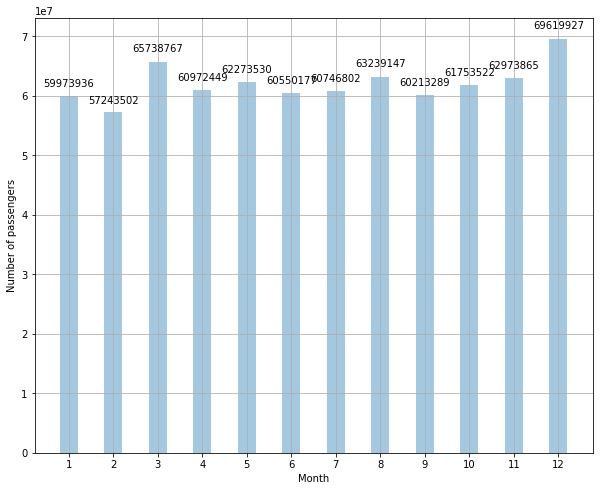

月份			乘客數
1月份 : 		59973936
2月份 : 		57243502
3月份 : 		65738767
4月份 : 		60972449
5月份 : 		62273530
6月份 : 		60550177
7月份 : 		60746802
8月份 : 		63239147
9月份 : 		60213289
10月份 : 		61753522
11月份 : 		62973865
12月份 : 		69619927


In [16]:
import matplotlib.pyplot as plt
import numpy as np

### 排序，依乘客數排序
def takeThird(elem):
    return elem[2]

total_info_list.sort(key=takeThird, reverse=True)
### 排序，依乘客數排序

plt.figure(figsize=(10,8)) #整个现实图（框架）的大小
col_count = 12
bar_width = 0.4
index = np.arange(col_count)
A_scores = (total_passenger_number_list_per_month[0],
            total_passenger_number_list_per_month[1],
            total_passenger_number_list_per_month[2],
            total_passenger_number_list_per_month[3],
            total_passenger_number_list_per_month[4],
            total_passenger_number_list_per_month[5],
            total_passenger_number_list_per_month[6],
            total_passenger_number_list_per_month[7],
            total_passenger_number_list_per_month[8],
            total_passenger_number_list_per_month[9],
            total_passenger_number_list_per_month[10],
            total_passenger_number_list_per_month[11])

A = plt.bar(index,
           A_scores, 
           bar_width,
           alpha=.4)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",)
        
createLabels(A)

plt.ylabel("Number of passengers")
plt.xlabel("Month")
plt.xticks(index+.0 / 2 ,("1",
                             "2",
                             "3",
                             "4",
                             "5",
                             "6",
                             "7",
                             "8",
                             "9",
                             "10",
                             "11",
                             "12"))

plt.grid(True)
plt.show()

print("月份\t\t\t乘客數")
print("1月份 : " + "\t\t" + str(total_passenger_number_list_per_month[0]))
print("2月份 : " + "\t\t" + str(total_passenger_number_list_per_month[1]))
print("3月份 : " + "\t\t" + str(total_passenger_number_list_per_month[2]))
print("4月份 : " + "\t\t" + str(total_passenger_number_list_per_month[3]))
print("5月份 : " + "\t\t" + str(total_passenger_number_list_per_month[4]))
print("6月份 : " + "\t\t" + str(total_passenger_number_list_per_month[5]))
print("7月份 : " + "\t\t" + str(total_passenger_number_list_per_month[6]))
print("8月份 : " + "\t\t" + str(total_passenger_number_list_per_month[7]))
print("9月份 : " + "\t\t" + str(total_passenger_number_list_per_month[8]))
print("10月份 : " + "\t\t" + str(total_passenger_number_list_per_month[9]))
print("11月份 : " + "\t\t" + str(total_passenger_number_list_per_month[10]))
print("12月份 : " + "\t\t" + str(total_passenger_number_list_per_month[11]))

# 2017 每個月份的總乘客數(出站人數) 長方圖

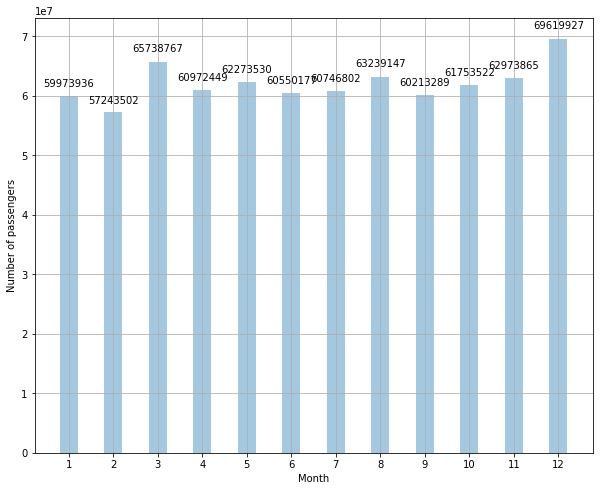

月份			乘客數
1月份 : 		59973936
2月份 : 		57243502
3月份 : 		65738767
4月份 : 		60972449
5月份 : 		62273530
6月份 : 		60550177
7月份 : 		60746802
8月份 : 		63239147
9月份 : 		60213289
10月份 : 		61753522
11月份 : 		62973865
12月份 : 		69619927


In [18]:
import matplotlib.pyplot as plt
import numpy as np

### 排序，依乘客數排序
def takeThird(elem):
    return elem[2]

total_info_list.sort(key=takeThird, reverse=True)
### 排序，依乘客數排序

plt.figure(figsize=(10,8)) #整个现实图（框架）的大小
col_count = 12
bar_width = 0.4
index = np.arange(col_count)
A_scores = (total_passenger_number_list_per_month[0],
            total_passenger_number_list_per_month[1],
            total_passenger_number_list_per_month[2],
            total_passenger_number_list_per_month[3],
            total_passenger_number_list_per_month[4],
            total_passenger_number_list_per_month[5],
            total_passenger_number_list_per_month[6],
            total_passenger_number_list_per_month[7],
            total_passenger_number_list_per_month[8],
            total_passenger_number_list_per_month[9],
            total_passenger_number_list_per_month[10],
            total_passenger_number_list_per_month[11])

A = plt.bar(index,
           A_scores, 
           bar_width,
           alpha=.4)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",)
        
createLabels(A)

plt.ylabel("Number of passengers")
plt.xlabel("Month")
plt.xticks(index+.0 / 2 ,("1",
                             "2",
                             "3",
                             "4",
                             "5",
                             "6",
                             "7",
                             "8",
                             "9",
                             "10",
                             "11",
                             "12"))

plt.grid(True)
plt.show()

print("月份\t\t\t乘客數")
print("1月份 : " + "\t\t" + str(total_passenger_number_list_per_month[0]))
print("2月份 : " + "\t\t" + str(total_passenger_number_list_per_month[1]))
print("3月份 : " + "\t\t" + str(total_passenger_number_list_per_month[2]))
print("4月份 : " + "\t\t" + str(total_passenger_number_list_per_month[3]))
print("5月份 : " + "\t\t" + str(total_passenger_number_list_per_month[4]))
print("6月份 : " + "\t\t" + str(total_passenger_number_list_per_month[5]))
print("7月份 : " + "\t\t" + str(total_passenger_number_list_per_month[6]))
print("8月份 : " + "\t\t" + str(total_passenger_number_list_per_month[7]))
print("9月份 : " + "\t\t" + str(total_passenger_number_list_per_month[8]))
print("10月份 : " + "\t\t" + str(total_passenger_number_list_per_month[9]))
print("11月份 : " + "\t\t" + str(total_passenger_number_list_per_month[10]))
print("12月份 : " + "\t\t" + str(total_passenger_number_list_per_month[11]))

# 3.2 2018 每個月份的總乘客數

In [21]:
### 2018, 各月進出站乘客數

import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import gc

path = './HW2_data' # use your path
all_files = glob.glob(path + "/2018*.csv")
frame = pd.DataFrame()
list_ = []
total_info_list = []
file_number = 0

header_label = ['Date',"24_hour","start_sta","end_sta","num_passenger"]

### get station name
file_ = open("Station ID.txt", 'r', encoding='UTF-8')
data_in_line = file_.readlines()

station_id_list = []
station_list = []

for line in data_in_line:
    station_id_list.append(line.split( )[0])
    station_list.append(line.split( )[1])
file_.close()
### get station name

total_passenger_number_list = []
total_passenger_number_list_per_month = []

#### 對每一個檔案讀取
for file_ in all_files:
    print(" ------------------------------------------------------------ ")
    print(file_ + " : ")
    df = pd.read_csv(file_,index_col="start_sta",header=0,names=header_label)
    list_counter = 0;
    total_passenger_number = 0;
                
    #### 對每一站的乘客數做計數
    for station_name in station_list:
        num_list = []

        try:
            if(station_name == "大橋頭"):
                station_name = "大橋頭站";
            num_list = df.loc[station_name,"num_passenger"]

            if (not num_list.empty) :
                for num in num_list:
                    total_passenger_number += num
        except:
            print("except")
            print(station_name + " : 沒有資料")
                
    total_passenger_number_list_per_month.append(total_passenger_number)
    print(total_passenger_number)
    
    file_number += 1
    clear_df = {}
    df = pd.DataFrame(clear_df)
    del df
    gc.collect()
    

        
# clear list
# total_passenger_number_list.clear()
# total_info_list.clear()
station_id_list.clear()
station_list.clear()

 ------------------------------------------------------------ 
./HW2_data_2\201801.csv : 
64447211
 ------------------------------------------------------------ 
./HW2_data_2\201802.csv : 
54646262
 ------------------------------------------------------------ 
./HW2_data_2\201803.csv : 
67301695
 ------------------------------------------------------------ 
./HW2_data_2\201804.csv : 
60612615
 ------------------------------------------------------------ 
./HW2_data_2\201805.csv : 
64924136
 ------------------------------------------------------------ 
./HW2_data_2\201806.csv : 
61455119
 ------------------------------------------------------------ 
./HW2_data_2\201807.csv : 
62878117
 ------------------------------------------------------------ 
./HW2_data_2\201808.csv : 
64614051
 ------------------------------------------------------------ 
./HW2_data_2\201809.csv : 
60835452
 ------------------------------------------------------------ 
./HW2_data_2\201810.csv : 
67028919
 ---------

# 2018 每個月份的總乘客數(進站人數) 長方圖

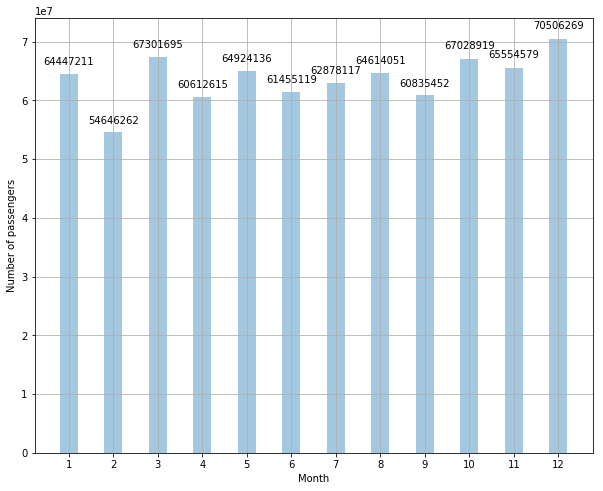

月份			乘客數
1月份 : 		64447211
2月份 : 		54646262
3月份 : 		67301695
4月份 : 		60612615
5月份 : 		64924136
6月份 : 		61455119
7月份 : 		62878117
8月份 : 		64614051
9月份 : 		60835452
10月份 : 		67028919
11月份 : 		65554579
12月份 : 		70506269


In [20]:
import matplotlib.pyplot as plt
import numpy as np

### 排序，依乘客數排序
def takeThird(elem):
    return elem[2]

total_info_list.sort(key=takeThird, reverse=True)
### 排序，依乘客數排序

plt.figure(figsize=(10,8)) #整个现实图（框架）的大小
col_count = 12
bar_width = 0.4
index = np.arange(col_count)
A_scores = (total_passenger_number_list_per_month[0],
            total_passenger_number_list_per_month[1],
            total_passenger_number_list_per_month[2],
            total_passenger_number_list_per_month[3],
            total_passenger_number_list_per_month[4],
            total_passenger_number_list_per_month[5],
            total_passenger_number_list_per_month[6],
            total_passenger_number_list_per_month[7],
            total_passenger_number_list_per_month[8],
            total_passenger_number_list_per_month[9],
            total_passenger_number_list_per_month[10],
            total_passenger_number_list_per_month[11])

A = plt.bar(index,
           A_scores, 
           bar_width,
           alpha=.4)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",)
        
createLabels(A)

plt.ylabel("Number of passengers")
plt.xlabel("Month")
plt.xticks(index+.0 / 2 ,("1",
                             "2",
                             "3",
                             "4",
                             "5",
                             "6",
                             "7",
                             "8",
                             "9",
                             "10",
                             "11",
                             "12"))

plt.grid(True)
plt.show()

print("月份\t\t\t乘客數")
print("1月份 : " + "\t\t" + str(total_passenger_number_list_per_month[0]))
print("2月份 : " + "\t\t" + str(total_passenger_number_list_per_month[1]))
print("3月份 : " + "\t\t" + str(total_passenger_number_list_per_month[2]))
print("4月份 : " + "\t\t" + str(total_passenger_number_list_per_month[3]))
print("5月份 : " + "\t\t" + str(total_passenger_number_list_per_month[4]))
print("6月份 : " + "\t\t" + str(total_passenger_number_list_per_month[5]))
print("7月份 : " + "\t\t" + str(total_passenger_number_list_per_month[6]))
print("8月份 : " + "\t\t" + str(total_passenger_number_list_per_month[7]))
print("9月份 : " + "\t\t" + str(total_passenger_number_list_per_month[8]))
print("10月份 : " + "\t\t" + str(total_passenger_number_list_per_month[9]))
print("11月份 : " + "\t\t" + str(total_passenger_number_list_per_month[10]))
print("12月份 : " + "\t\t" + str(total_passenger_number_list_per_month[11]))

# 2018 每個月份的總乘客數(出站人數) 長方圖

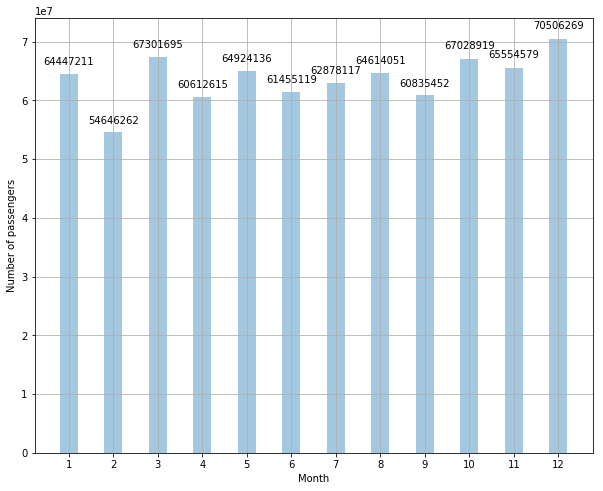

月份			乘客數
1月份 : 		64447211
2月份 : 		54646262
3月份 : 		67301695
4月份 : 		60612615
5月份 : 		64924136
6月份 : 		61455119
7月份 : 		62878117
8月份 : 		64614051
9月份 : 		60835452
10月份 : 		67028919
11月份 : 		65554579
12月份 : 		70506269


In [22]:
import matplotlib.pyplot as plt
import numpy as np

### 排序，依乘客數排序
def takeThird(elem):
    return elem[2]

total_info_list.sort(key=takeThird, reverse=True)
### 排序，依乘客數排序

plt.figure(figsize=(10,8)) #整个现实图（框架）的大小
col_count = 12
bar_width = 0.4
index = np.arange(col_count)
A_scores = (total_passenger_number_list_per_month[0],
            total_passenger_number_list_per_month[1],
            total_passenger_number_list_per_month[2],
            total_passenger_number_list_per_month[3],
            total_passenger_number_list_per_month[4],
            total_passenger_number_list_per_month[5],
            total_passenger_number_list_per_month[6],
            total_passenger_number_list_per_month[7],
            total_passenger_number_list_per_month[8],
            total_passenger_number_list_per_month[9],
            total_passenger_number_list_per_month[10],
            total_passenger_number_list_per_month[11])

A = plt.bar(index,
           A_scores, 
           bar_width,
           alpha=.4)

def createLabels(data):
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.02, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",)
        
createLabels(A)

plt.ylabel("Number of passengers")
plt.xlabel("Month")
plt.xticks(index+.0 / 2 ,("1",
                             "2",
                             "3",
                             "4",
                             "5",
                             "6",
                             "7",
                             "8",
                             "9",
                             "10",
                             "11",
                             "12"))

plt.grid(True)
plt.show()

print("月份\t\t\t乘客數")
print("1月份 : " + "\t\t" + str(total_passenger_number_list_per_month[0]))
print("2月份 : " + "\t\t" + str(total_passenger_number_list_per_month[1]))
print("3月份 : " + "\t\t" + str(total_passenger_number_list_per_month[2]))
print("4月份 : " + "\t\t" + str(total_passenger_number_list_per_month[3]))
print("5月份 : " + "\t\t" + str(total_passenger_number_list_per_month[4]))
print("6月份 : " + "\t\t" + str(total_passenger_number_list_per_month[5]))
print("7月份 : " + "\t\t" + str(total_passenger_number_list_per_month[6]))
print("8月份 : " + "\t\t" + str(total_passenger_number_list_per_month[7]))
print("9月份 : " + "\t\t" + str(total_passenger_number_list_per_month[8]))
print("10月份 : " + "\t\t" + str(total_passenger_number_list_per_month[9]))
print("11月份 : " + "\t\t" + str(total_passenger_number_list_per_month[10]))
print("12月份 : " + "\t\t" + str(total_passenger_number_list_per_month[11]))